In [266]:
import pandas as pd
import numpy as np

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [268]:
# Hide All Warnings
import warnings
warnings.filterwarnings('ignore')

In [269]:
#UDEMY DATASET
df = pd.read_csv("udemy_courses.csv")

In [270]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [271]:
#ALl the Columns
df.columns


Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

### Questions

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

In [272]:
# EDA ON 'subject'

#What is the distribution of subjects?

df['subject'].unique()


array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [273]:
# How many courses per subject?

len(df['subject'].unique())

4

In [274]:
#Distribution of subjects per year?

df['subject'].value_counts()


Web Development        1200
Business Finance       1199
Musical Instruments     681
Graphic Design          603
Name: subject, dtype: int64

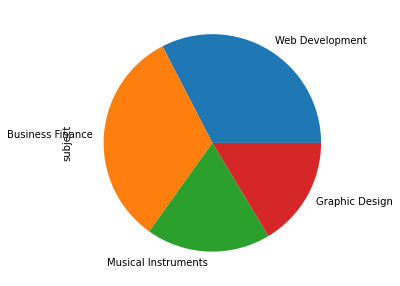

In [275]:
# Which subject is the most popular?

## plot Distribution of subjects per year with pie chart

plt.figure(figsize=(10,5))
df['subject'].value_counts().plot(kind='pie')
plt.show()

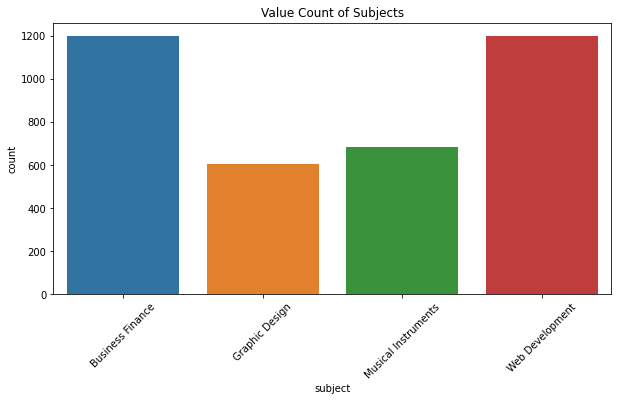

In [276]:
# How many people purchase a particular subject?
## plot Distribution of subjects per year using seaborn

plt.figure(figsize=(10,5))
sns.countplot(df['subject'])
plt.title("Value Count of Subjects")
plt.xticks(rotation=45)
plt.show()

## Answers

+ Subjects/Category
	- What is the distribution of subjects  
        ####   'Business Finance', 'Graphic Design', 'Musical Instruments' , 'Web Development'     
	- How many courses per subject  
        ####  4
    - Distribution of subjects per year/ - How many people purchase a particular subject  ??
        ####  Web Development        1200, Business Finance       1199,       Musical Instruments     681, Graphic Design          603     
	- Which subject is the most popular - 
         ####   Web Development

 
# Questions
+ Subscribers

    - Number of subscribers per subject
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

In [277]:
#EDA ON 'num_subscribers'
# Number of subscribers per subject

df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1870747
Graphic Design         1063148
Musical Instruments     846719
Web Development        7980572
Name: num_subscribers, dtype: int64

<AxesSubplot:ylabel='num_subscribers'>

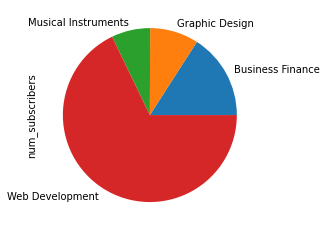

In [278]:
# Which subject have the highest number of subscribers?

df.groupby('subject')['num_subscribers'].sum().plot(kind='pie')

In [279]:
# TOtal number of subscribers in Udemy?
df['num_subscribers'].sum()


11761186

In [280]:
# Average number of subscribers?
df['num_subscribers'].mean()

3193.3711648112953

In [281]:
# Every other type of Calculation for number of subscribers?
df['num_subscribers'].describe()

count      3683.000000
mean       3193.371165
std        9498.231406
min           0.000000
25%         110.000000
50%         911.000000
75%        2537.500000
max      268923.000000
Name: num_subscribers, dtype: float64

In [282]:
# Which COURSE have the highest number of subscribers?

df['num_subscribers'].idxmax() #position/id of max sub

2832

In [283]:
df.iloc[2832]  #location of that max sub id

course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                               Free
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
Name: 2832, dtype: object

 
 ## Answers
+ Subscribers

    - Number of subscribers per subject
    #### Business Finance  = 1870747, Graphic Design   =  1063148, Musical Instruments = 846719, Web Development  = 7980572
	- Which course have the highest number of subscribers
    #### Web Develpoment
    - Average number of subscribers
    #### 3193.37
	- Total Number of subscribers in Udemy
    #### 11761186
	- Which COURSE have the highest number of subscribers ?  and the number?
    ####   Learn HTML5 Programming From Scratch  and 268923 

# Questions
+ Levels
	- How many levels do we have
	- How many subscribers per levels (per subject)
	- How many lectures per levels (per subject)
    - How many reviews per levels (per subject)


In [284]:
len(df['level'].unique())

5

In [285]:
# EDA on LEVEL

def plot_num_of_countable_features(feature):
    
    # How many {} per level per subject?"
    #seaborn
    plt.figure(figsize=(10,5))
    plt.title(f"Plot of {feature} per level per subject")
    sns.barplot(x='level', y=feature , hue='subject', data=df, ci=None)
#     plt.show()
    
    #How many {} per levels?
    plt.figure(figsize=(10,5))
    plt.title(f"Plot of {feature} per level")
    df.groupby('level')[feature].sum().plot(kind='pie')
#     plt.show()
    
    

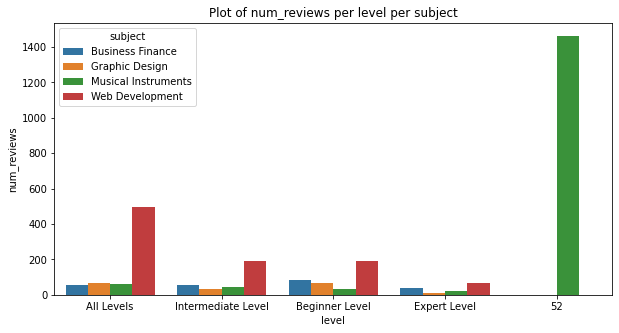

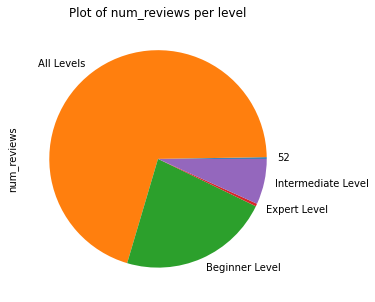

In [286]:
# How many reviews per level per subject?
# How many reviews per levels?
plot_num_of_countable_features('num_reviews')

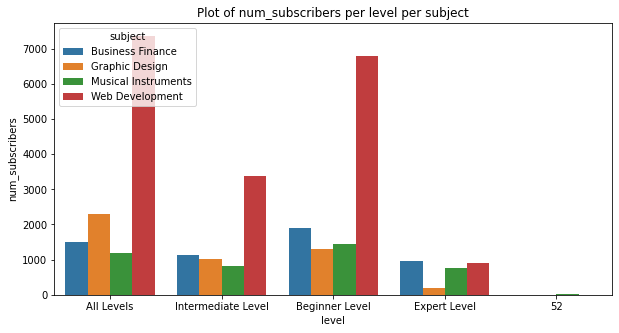

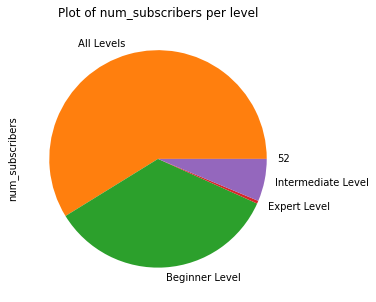

In [287]:
# How many subscribers per level per subject?
# How many subscribers per level?
plot_num_of_countable_features('num_subscribers')

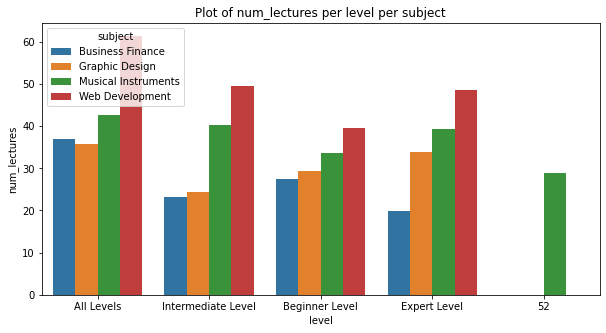

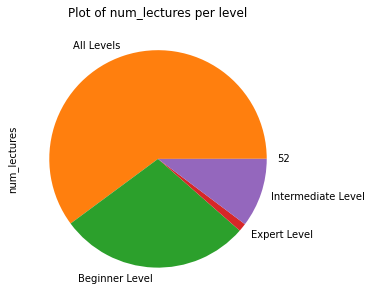

In [288]:
# How many lectures per level per subject?
# How many lectures per level?
plot_num_of_countable_features('num_lectures')

In [289]:
   
def num_of_countable_features(feature):
    print(df.groupby('level')[feature].sum())


In [290]:
num_of_countable_features('num_subscribers')

level
52                         30
All Levels            6916112
Beginner Level        4052843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64


In [291]:
num_of_countable_features('num_reviews')

level
52                      1463
All Levels            404300
Beginner Level        129086
Expert Level            2333
Intermediate Level     39016
Name: num_reviews, dtype: int64


In [292]:
num_of_countable_features('num_lectures')

level
52                       29
All Levels            88698
Beginner Level        41908
Expert Level           1785
Intermediate Level    15129
Name: num_lectures, dtype: int64


# Answer

+ Levels
	- How many levels do we have 
    #### 5
	- How many subscribers per levels (per subject)
    #### 52  = 30, All Levels = 6916112, Beginner Level = 4052843, Expert Level = 50196, Intermediate Level = 742005
	- How many lectures per levels (per subject)
    #### 52  = 1463, All Levels = 404300, Beginner Level = 129086, Expert Level = 2333, Intermediate Level = 39016
    - How many reviews per levels (per subject)
    #### 52  = 29, All Levels = 88698, Beginner Level = 41908, Expert Level = 1785, Intermediate Level = 15129

# Questions
+ Price
	- What is the average price of a course
	- What is the min/max price
	- how many course are Free or Paid
	- The most  profitable course? how much?

In [293]:
#EDA on PRICE


In [294]:
# What is the average price of a course?
df['price'].dtype

dtype('O')

In [295]:
df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135', 'TRUE'],
      dtype=object)

In [296]:
df['price']=df['price'].str.replace('Free|TRUE','0')

In [297]:
df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', '0', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

In [298]:
df['price']=df['price'].astype(float)

In [299]:
# What is the average price of a course?
#What is the min/max price?
df['price'].describe()

count    3683.000000
mean       65.992398
std        60.985586
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

In [300]:
#The most  profitable course? and how much exactly?
df['profit']=df['price']*df['num_subscribers']

In [301]:
df['profit'].max()

24316800.0

In [302]:
df['profit'].idxmax()

3235

In [303]:
df.iloc[3235]

course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                              200.0
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                43 hours
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
profit                                                        24316800.0
Name: 3235, dtype: object

In [306]:


## how many course are Free or Paid
df['is_paid'].unique()

array(['True', 'False', 'FALSE', 'TRUE',
       'https://www.udemy.com/learnguitartoworship/'], dtype=object)

In [307]:
paid_dict = {'True':True,'False':False,'FALSE':False,'TRUE':True,'https://www.udemy.com/learnguitartoworship/':True}
df['is_paid'] = df['is_paid'].map(paid_dict)
df['is_paid'].value_counts()

True     3373
False     310
Name: is_paid, dtype: int64

<AxesSubplot:xlabel='is_paid', ylabel='count'>

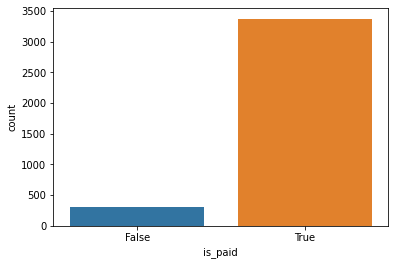

In [308]:
sns.countplot(df['is_paid'])

In [309]:
df.groupby('is_paid')['subject'].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1103
         Web Development        1067
         Musical Instruments     635
         Graphic Design          568
Name: subject, dtype: int64

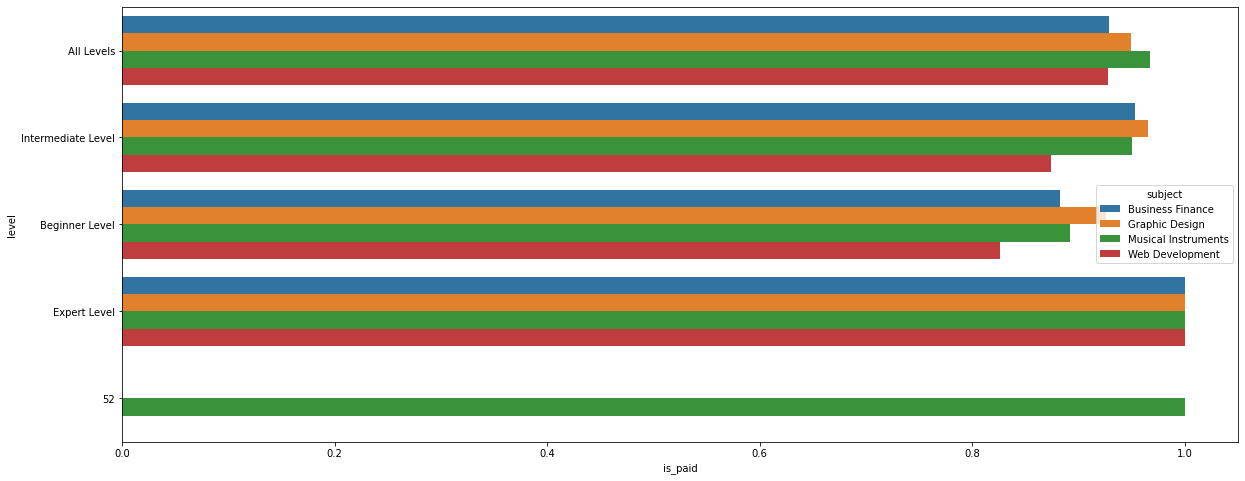

In [318]:
plt.figure(figsize=(20,8))
sns.barplot(x='is_paid',y='level',hue='subject',data=df,ci=None)
plt.show()

# Answers
+ Price 

    - What is the average price of a course   
    #### 65.99
    - What is the min/max price 
    #### 0 and 200
    - how many course are Free and Paid
    ####  3373 and 310
    - The most  profitable course? how much?
    ####   The Web Developer Bootcamp  (2.4M )

# Correlation Charts

 + Correlation 
	- Does number of subscribers depend on number of reviews
	- Does number of subscribers depend on price
	
    - Does Reviews Influence Subscription Per Subject Category
    - Does Price Influence Subscription Per Subject Category
	

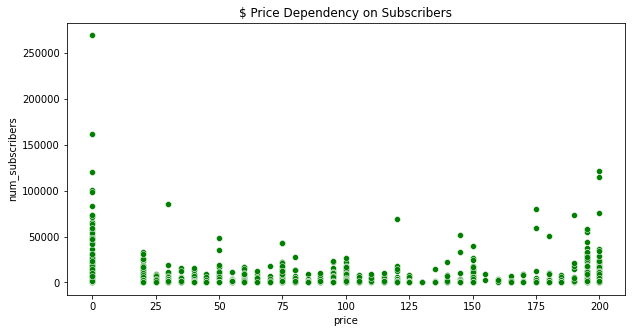

In [322]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='price',y='num_subscribers',color='green')
plt.title('$ Price Dependency on Subscribers')
plt.show()

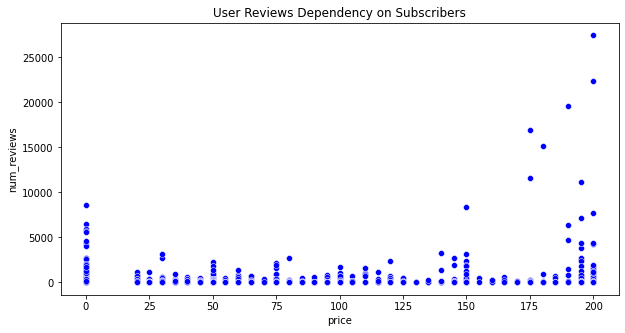

In [330]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='price',y='num_reviews',color='blue')
plt.title('User Reviews Dependency on Subscribers')
plt.show()

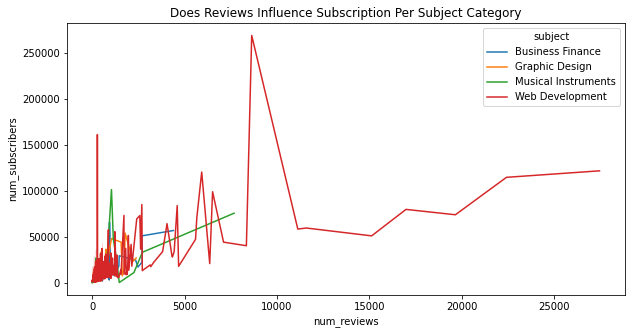

In [328]:
plt.figure(figsize=(10,5))
plt.title("Does Reviews Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='num_reviews',y='num_subscribers',hue='subject')
plt.show()

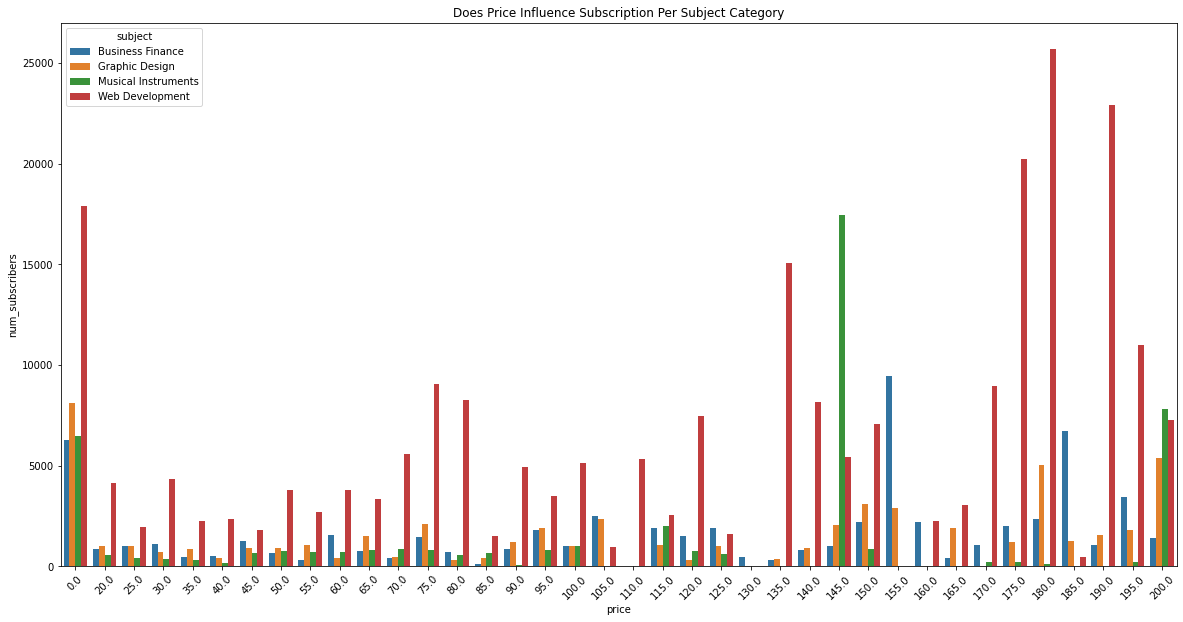

In [339]:
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category")
sns.barplot(data=df,x='price',y='num_subscribers',hue='subject',ci=None)
plt.xticks(rotation=45)
plt.show()